In [82]:
# FlightPricePrediction


import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.model_selection import cross_val_score,GridSearchCV
%matplotlib inline


import warnings
warnings.filterwarnings('ignore')


df_train=pd.read_csv(r'C:\ProgramData\FlightPricePred_Train.csv')
df_test=pd.read_csv(r'C:\ProgramData\FlightPricePred_Test.csv')
df_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [2]:
df_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL ? BOM ? COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? MAA ? BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL ? BOM ? COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL ? BOM ? COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR ? DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [3]:
df_train.shape

(10683, 11)

In [4]:
df_test.shape

(2671, 10)

In [5]:
# Exploratory Data Analysis
# Important Observations :
# The dataset comprises of 10683 rows and 11 columns in training dataset and 2671 rows and 10 columns in test dataset
# Description of features :

#Airline: Airlines like Indigo, Jet Airways, Air India etc
#Date_of_Journey:Date on which the passenger will travel
#Source: Place where passenger will board
#Destination: Place where passenger will stop
#Route: route through which passengers will travel from his/her source to their destination.
#Arrival_Time: Time at which passenger will reach destination
#Duration: Total time a flight will take to complete its journey from source to destination.
#Total_Stops: Number of places flights will stop in the whole journey.
#Additional_Info: Information about food and other facilities
#Price: Price of the flight for a complete journey 

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [7]:
# Above data shows that there are few missing values.Lets check for null values

In [8]:
# Checking for null values

df_train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [9]:
df_test.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In [10]:
# Clealry few null values could be found in training dataset.We will drop them

In [11]:
# Dropping the null values

df_train.dropna(inplace=True)

In [12]:
# Null values are dropped succesfully

df_train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [13]:
# Statistical summary

df_train.describe()

,Price
count,10682.000000
mean,9087.214567
std,4611.548810
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [14]:
# Checking for dulicate values

df_train[df_train.duplicated()].head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
683,Jet Airways,1/06/2019,Delhi,Cochin,DEL ? NAG ? BOM ? COK,14:35,04:25 02 Jun,13h 50m,2 stops,No info,13376
1061,Air India,21/05/2019,Delhi,Cochin,DEL ? GOI ? BOM ? COK,22:00,19:15 22 May,21h 15m,2 stops,No info,10231
1348,Air India,18/05/2019,Delhi,Cochin,DEL ? HYD ? BOM ? COK,17:15,19:15 19 May,26h,2 stops,No info,12392
1418,Jet Airways,6/06/2019,Delhi,Cochin,DEL ? JAI ? BOM ? COK,05:30,04:25 07 Jun,22h 55m,2 stops,In-flight meal not included,10368
1674,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,18:25,21:20,2h 55m,non-stop,No info,7303


In [15]:
# Dropping duplicate values ,rows

df_train.drop_duplicates(keep='first',inplace=True)
df_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [16]:
# Splitting the Date_of_Journey column to extract the ‘Date’, ‘Month’ and ‘Year’ values, and 
# store them in new columns in our dataframe

df_train['Date_of_Journey']=df_train['Date_of_Journey'].str.split('/')
df_train['Date_of_Journey']

0        [24, 03, 2019]
1         [1, 05, 2019]
2         [9, 06, 2019]
3        [12, 05, 2019]
4        [01, 03, 2019]
              ...      
10678     [9, 04, 2019]
10679    [27, 04, 2019]
10680    [27, 04, 2019]
10681    [01, 03, 2019]
10682     [9, 05, 2019]
Name: Date_of_Journey, Length: 10462, dtype: object

In [17]:
df_train['Date']=df_train['Date_of_Journey'].str[0]
df_train['Month']=df_train['Date_of_Journey'].str[1]
df_train['Year']=df_train['Date_of_Journey'].str[2]

In [18]:
# Splitting the route column and storing extracted city names in different columns

df_train['Route']=df_train['Route'].str.split('?')
df_train['Route']

0                      [BLR ,  DEL]
1        [CCU ,  IXR ,  BBI ,  BLR]
2        [DEL ,  LKO ,  BOM ,  COK]
3               [CCU ,  NAG ,  BLR]
4               [BLR ,  NAG ,  DEL]
                    ...            
10678                  [CCU ,  BLR]
10679                  [CCU ,  BLR]
10680                  [BLR ,  DEL]
10681                  [BLR ,  DEL]
10682    [DEL ,  GOI ,  BOM ,  COK]
Name: Route, Length: 10462, dtype: object

In [19]:
df_train['City_1']=df_train['Route'].str[0]
df_train['City_2']=df_train['Route'].str[1]
df_train['City_3']=df_train['Route'].str[2]
df_train['City_4']=df_train['Route'].str[3]

In [20]:
df_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,City_1,City_2,City_3,City_4
0,IndiGo,"[24, 03, 2019]",Banglore,New Delhi,"[BLR , DEL]",22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,03,2019,BLR,DEL,NaN,NaN
1,Air India,"[1, 05, 2019]",Kolkata,Banglore,"[CCU , IXR , BBI , BLR]",05:50,13:15,7h 25m,2 stops,No info,7662,1,05,2019,CCU,IXR,BBI,BLR
2,Jet Airways,"[9, 06, 2019]",Delhi,Cochin,"[DEL , LKO , BOM , COK]",09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,06,2019,DEL,LKO,BOM,COK
3,IndiGo,"[12, 05, 2019]",Kolkata,Banglore,"[CCU , NAG , BLR]",18:05,23:30,5h 25m,1 stop,No info,6218,12,05,2019,CCU,NAG,BLR,NaN
4,IndiGo,"[01, 03, 2019]",Banglore,New Delhi,"[BLR , NAG , DEL]",16:50,21:35,4h 45m,1 stop,No info,13302,01,03,2019,BLR,NAG,DEL,NaN


In [21]:
# Splitting Departure Time in hours and minutes

df_train['Dep_Time']=df_train['Dep_Time'].str.split(':')
df_train['Dep_Time']

0        [22, 20]
1        [05, 50]
2        [09, 25]
3        [18, 05]
4        [16, 50]
           ...   
10678    [19, 55]
10679    [20, 45]
10680    [08, 20]
10681    [11, 30]
10682    [10, 55]
Name: Dep_Time, Length: 10462, dtype: object

In [22]:
df_train['Dep_Time_Hour']=df_train['Dep_Time'].str[0]
df_train['Dep_Time_Min']=df_train['Dep_Time'].str[1]

In [23]:
# Splitting Arrival Time variable

df_train['Arrival_Time']=df_train['Arrival_Time'].str.split(' ')
df_train['Arrival_Dt']=df_train['Arrival_Time'].str[1]

In [24]:
df_train['Time_of_Arrival']=df_train['Arrival_Time'].str[0]
df_train['Time_of_Arrival']=df_train['Time_of_Arrival'].str.split(':')
df_train['Arrival_Time_Hours']=df_train['Time_of_Arrival'].str[0]
df_train['Arrival_Time_Min']=df_train['Time_of_Arrival'].str[1]

In [25]:
# Splitting Duration variable

df_train['Duration']=df_train['Duration'].str.split(' ')
df_train['Duration_hours']=df_train['Duration'].str[0] # extracting hours from duration
df_train['Duration_hours']=df_train['Duration_hours'].str.split('h')
df_train['Duration_hours']=df_train['Duration_hours'].str[0]

In [26]:
df_train['Duration_min']=df_train['Duration'].str[1] # extracting minutes from duration
df_train['Duration_min']=df_train['Duration_min'].str.split('m')
df_train['Duration_min']=df_train['Duration_min'].str[0]

In [27]:
# Exploring Total_Stops column 

df_train['Total_Stops'].replace('non-stop','0',inplace=True) # replacing non-stop flights with 0 value
df_train['Total_Stops']=df_train['Total_Stops'].str.split(' ') # splitting Total_Stops 
df_train['Total_Stops']=df_train['Total_Stops'].str[0] # extracting the integer part of the ‘Total_Stops’ column

In [28]:
# Exploring Additional_Info column 

df_train['Additional_Info'].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [29]:
df_train['Additional_Info'].replace('No Info','No info',inplace=True)

In [30]:
# Dropping unnecessary columns

col=['Date_of_Journey','Route','Dep_Time','Arrival_Time','Duration','Time_of_Arrival']
df_train.drop(col,axis=1,inplace=True)

In [31]:
df_train.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,City_1,City_2,City_3,City_4,Dep_Time_Hour,Dep_Time_Min,Arrival_Dt,Arrival_Time_Hours,Arrival_Time_Min,Duration_hours,Duration_min
0,IndiGo,Banglore,New Delhi,0,No info,3897,24,03,2019,BLR,DEL,NaN,NaN,22,20,22,01,10,2,50
1,Air India,Kolkata,Banglore,2,No info,7662,1,05,2019,CCU,IXR,BBI,BLR,05,50,NaN,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,No info,13882,9,06,2019,DEL,LKO,BOM,COK,09,25,10,04,25,19,NaN
3,IndiGo,Kolkata,Banglore,1,No info,6218,12,05,2019,CCU,NAG,BLR,NaN,18,05,NaN,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,No info,13302,01,03,2019,BLR,NAG,DEL,NaN,16,50,NaN,21,35,4,45


In [32]:
df_train.isnull().sum()

Airline                  0
Source                   0
Destination              0
Total_Stops              0
Additional_Info          0
Price                    0
Date                     0
Month                    0
Year                     0
City_1                   0
City_2                   0
City_3                3475
City_4                9100
Dep_Time_Hour            0
Dep_Time_Min             0
Arrival_Dt            6320
Arrival_Time_Hours       0
Arrival_Time_Min         0
Duration_hours           0
Duration_min          1006
dtype: int64

In [33]:
# Filling the missing values

# Clearly from above City_4 has maximum null values(9100 out of 10683),so we will be dropping City_4

df_train.drop('City_4',inplace=True,axis=1)

In [34]:
# We need to  replace ‘NaN’ values in ‘City_3’ with ‘None’, 
#since rows where ‘City3’ is missing did not have any stop, just the source and the destination.

df_train['City_3'].fillna('None',inplace=True)

In [35]:
# Replacing missing values in ‘Arrival_date’ column with values in ‘Date’ column

df_train['Arrival_Dt'].fillna(df_train['Date'],inplace=True)

In [36]:
# Replacing missing values in ‘Duration_min’ as 0, since the missing values is the duration time in hours not in min.

df_train['Duration_min'].fillna(0,inplace=True)

In [37]:
# Checking datatypes in dataset,as many columns are of 'object' type which should be of 'int' type

df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10462 entries, 0 to 10682
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Airline             10462 non-null  object
 1   Source              10462 non-null  object
 2   Destination         10462 non-null  object
 3   Total_Stops         10462 non-null  object
 4   Additional_Info     10462 non-null  object
 5   Price               10462 non-null  int64 
 6   Date                10462 non-null  object
 7   Month               10462 non-null  object
 8   Year                10462 non-null  object
 9   City_1              10462 non-null  object
 10  City_2              10462 non-null  object
 11  City_3              10462 non-null  object
 12  Dep_Time_Hour       10462 non-null  object
 13  Dep_Time_Min        10462 non-null  object
 14  Arrival_Dt          10462 non-null  object
 15  Arrival_Time_Hours  10462 non-null  object
 16  Arrival_Time_Min    10

In [38]:
# Changing datatype of numerical columns from object to int datatype

df_train['Date']=df_train['Date'].astype('int64')
df_train['Month']=df_train['Month'].astype('int64')
df_train['Year']=df_train['Year'].astype('int64')
df_train['Total_Stops']=df_train['Total_Stops'].astype('int64')
df_train['Dep_Time_Hour']=df_train['Dep_Time_Hour'].astype('int64')
df_train['Dep_Time_Min']=df_train['Dep_Time_Min'].astype('int64')
df_train['Arrival_Dt']=df_train['Arrival_Dt'].astype('int64')
df_train['Arrival_Time_Hours']=df_train['Arrival_Time_Hours'].astype('int64')
df_train['Arrival_Time_Min']=df_train['Arrival_Time_Min'].astype('int64')
df_train['Duration_min']=df_train['Duration_min'].astype('int64')


In [39]:
# Finding the row having Duration_hours as 5m,as journey cannot be of 5m.So we need to drop the row

df_train[df_train['Duration_hours']=='5m']

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,City_1,City_2,City_3,Dep_Time_Hour,Dep_Time_Min,Arrival_Dt,Arrival_Time_Hours,Arrival_Time_Min,Duration_hours,Duration_min
6474,Air India,Mumbai,Hyderabad,2,No info,17327,6,3,2019,BOM,GOI,PNQ,16,50,6,16,55,5m,0


In [40]:
# Dropping the row with index 6474 from dataset

df_train.drop(index=6474,inplace=True,axis=0)

In [41]:
# Changing datatype of Duration_hours column from object to int datatype

df_train['Duration_hours']=df_train['Duration_hours'].astype('int64')

In [42]:
# Separating categorical and numerical columns for proper data visualization

cat=['Airline','Source','Destination','City_1','City_2','City_3','Additional_Info']
num=['Date','Month','Year','Dep_Time_Hour','Dep_Time_Min','Arrival_Dt','Arrival_Time_Hours','Arrival_Time_Min','Duration_hours','Duration_min','Price']

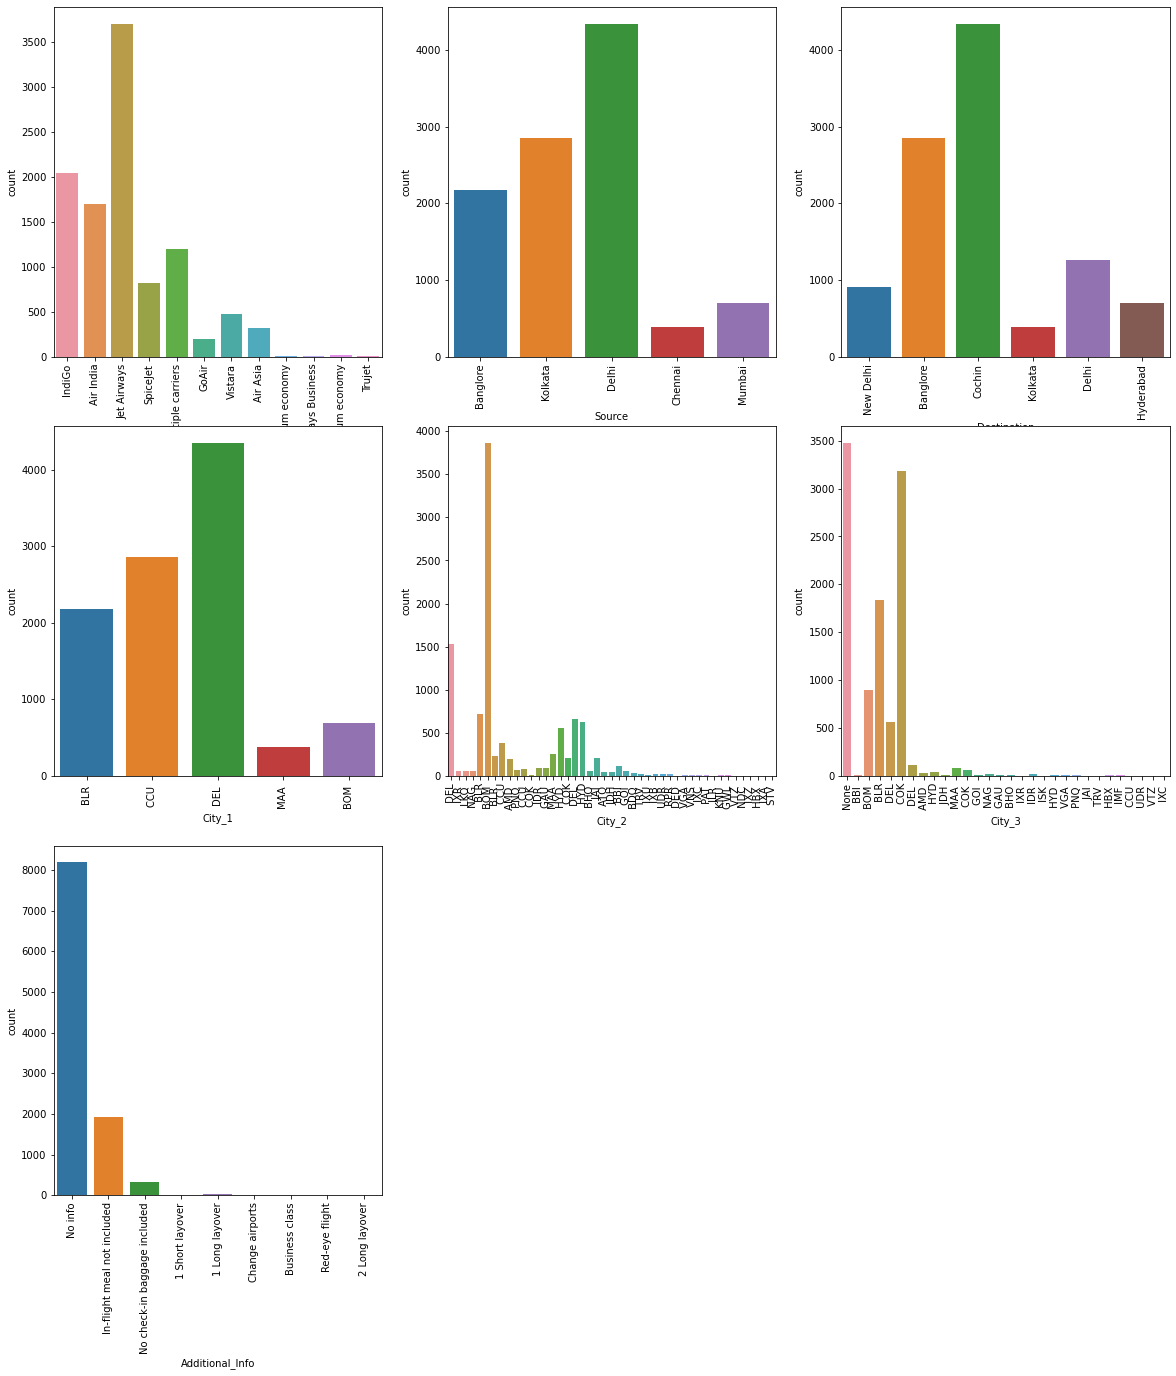

In [43]:
# Visualizing categorical features through countplot

a=1
plt.figure(figsize=(20,45))

for i in cat:
    plt.subplot(6,3,a)
    sns.countplot(df_train[i])
    plt.xticks(rotation=90)
    a=a+1

plt.show()

In [44]:
# Important observation from above plots:

# 1) Jet Airways is the most preferred airline with the highest row count, followed by Indigo and AirIndia
# 2) Maximum flights take off from Delhi,least from Chennai
# 3) Maximum flights land in Cochin,least in Kolkatta
# 4) Majority of the flights have a stop in Bombay.


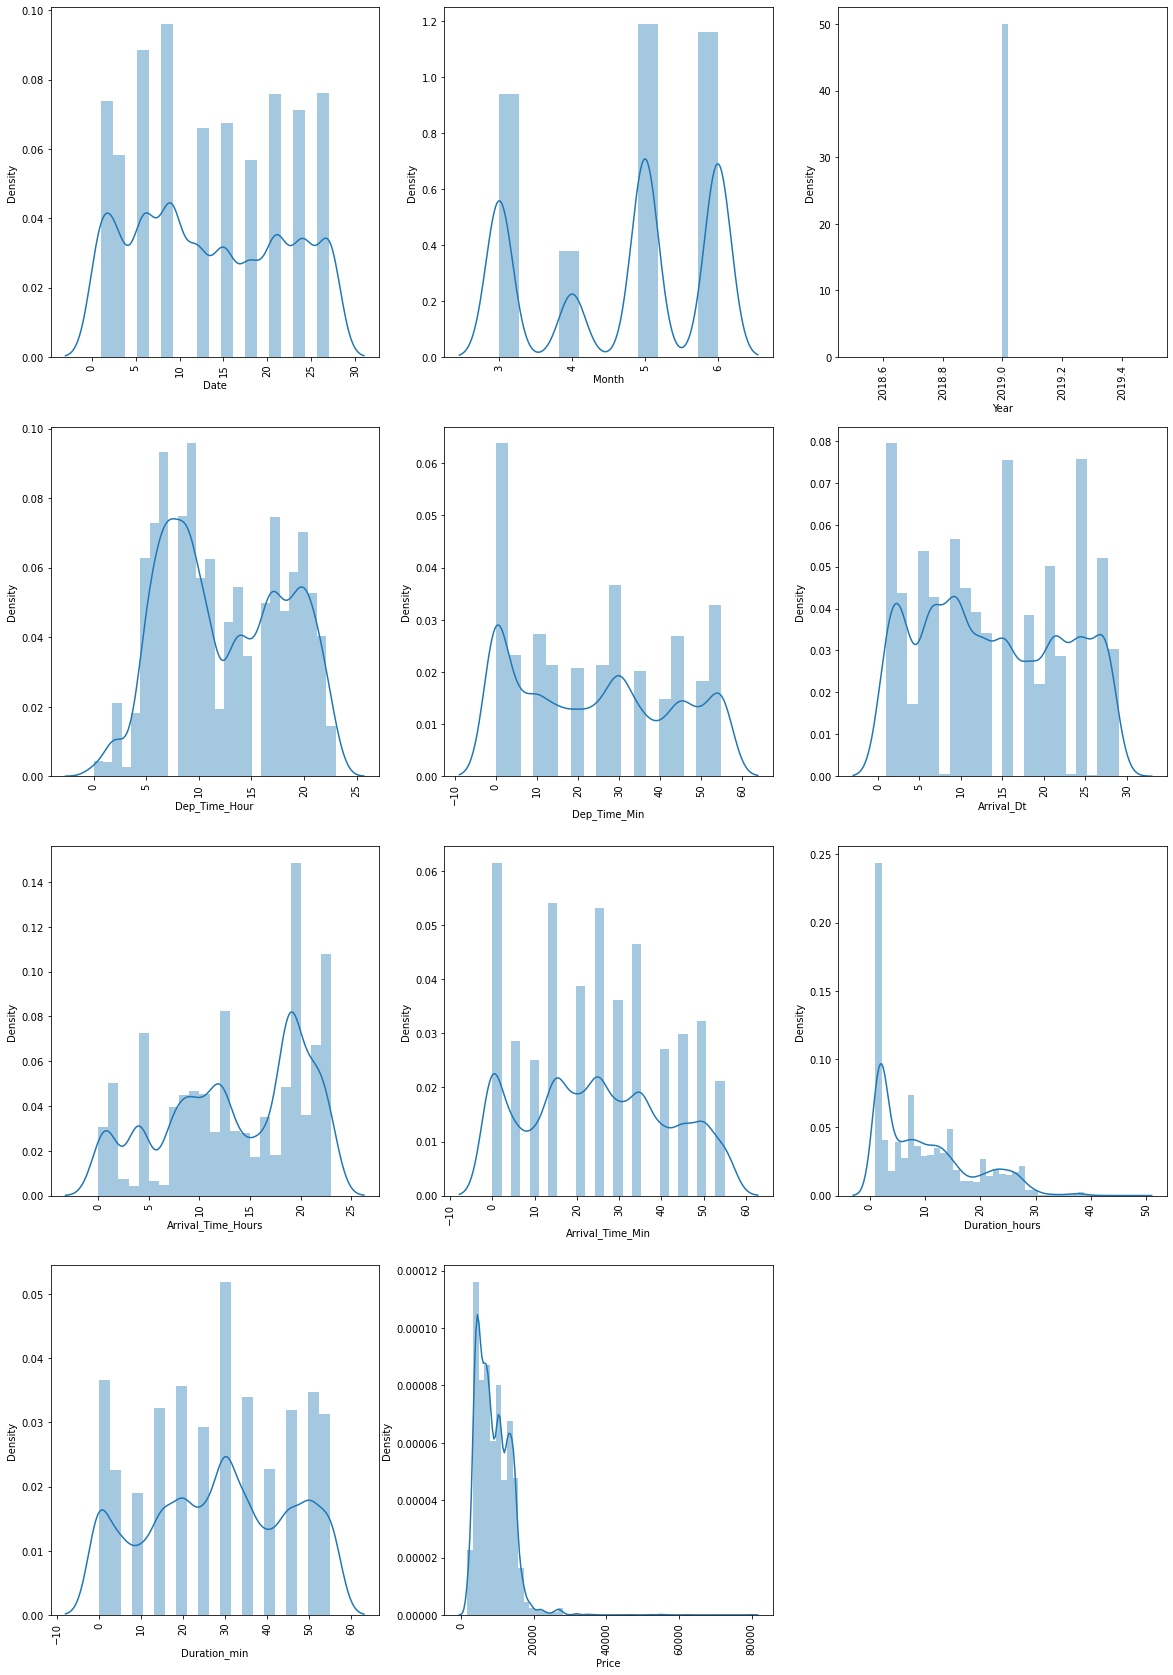

In [45]:
# Distibution plots of numerical columns:

a=1
plt.figure(figsize=(20,45))

for i in num:
    plt.subplot(6,3,a)
    sns.distplot(df_train[i])
    plt.xticks(rotation=90)
    a=a+1

plt.show()

In [46]:
# Important observations from above plots :

# 1) Maximum flights have stops as 1, flights with 3 and 4 stops are quite low
# 2) Majority of the flights  fly in the early morning time
# 3) Majority of the flights take off and land on the same day
# 4) Price column is rightly skewed and maximum flights are under 20000 price

<function matplotlib.pyplot.show(close=None, block=None)>

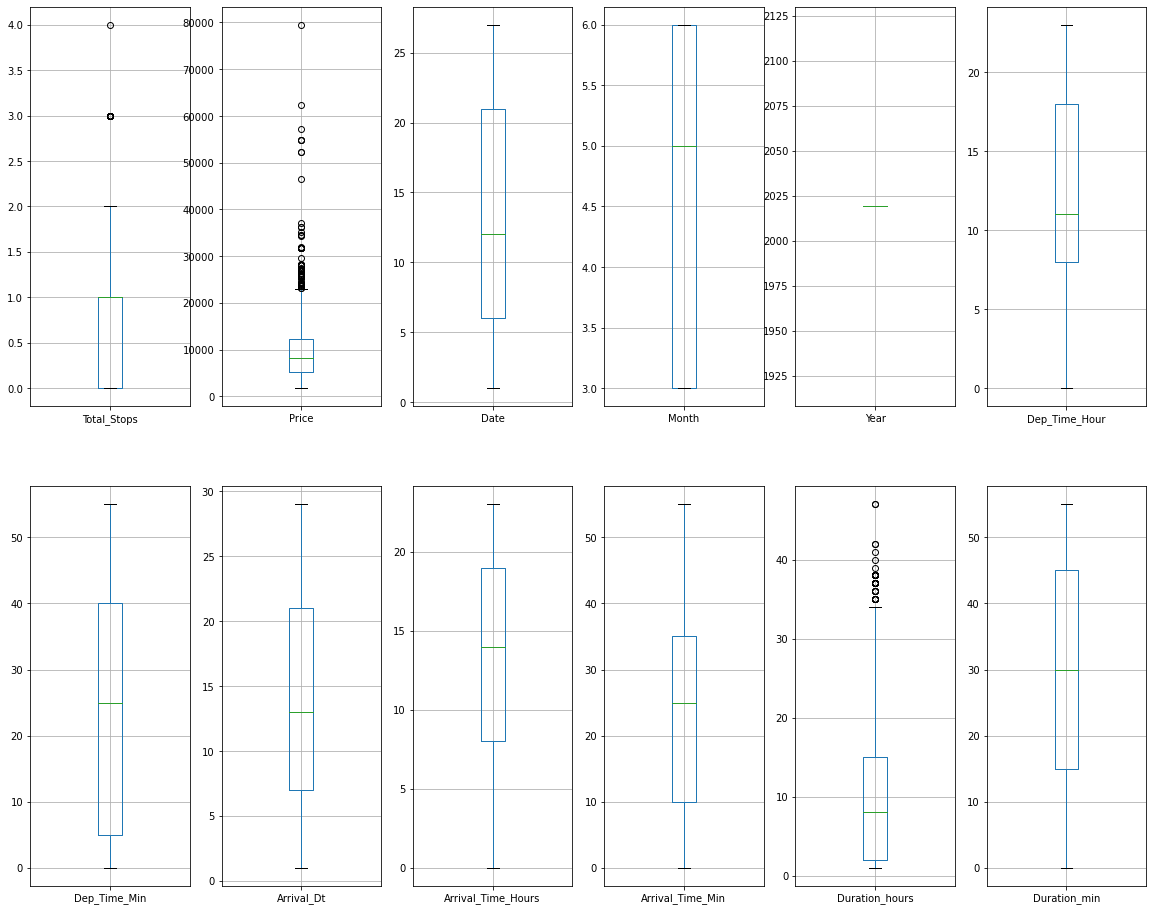

In [47]:
# plotting boxplot to check outliers

df_train.plot(kind='box', subplots=True, layout=(3,6), figsize=(20,25), grid=True)
plt.show

In [48]:
# Clearly outliers could be seen in Price,Duration_hours and Total_Stops columns
# Making changes in Duration_hours and Total_Stops column would affect Price ,so we will not remove outliers

In [49]:
# checking skewness in dataset

df_train.skew().sort_values()

Arrival_Time_Hours   -0.378863
Month                -0.377753
Duration_min         -0.086035
Year                  0.000000
Dep_Time_Hour         0.108461
Arrival_Time_Min      0.110791
Date                  0.124448
Arrival_Dt            0.125494
Dep_Time_Min          0.171488
Total_Stops           0.332400
Duration_hours        0.892611
Price                 1.858221
dtype: float64

In [50]:
# Removing skewness from Duration_hours

df_train['Duration_hours']=np.log(df_train['Duration_hours'])

In [51]:
df_train['Duration_hours'].skew()

-0.24502896907534769

In [52]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10461 entries, 0 to 10682
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Airline             10461 non-null  object 
 1   Source              10461 non-null  object 
 2   Destination         10461 non-null  object 
 3   Total_Stops         10461 non-null  int64  
 4   Additional_Info     10461 non-null  object 
 5   Price               10461 non-null  int64  
 6   Date                10461 non-null  int64  
 7   Month               10461 non-null  int64  
 8   Year                10461 non-null  int64  
 9   City_1              10461 non-null  object 
 10  City_2              10461 non-null  object 
 11  City_3              10461 non-null  object 
 12  Dep_Time_Hour       10461 non-null  int64  
 13  Dep_Time_Min        10461 non-null  int64  
 14  Arrival_Dt          10461 non-null  int64  
 15  Arrival_Time_Hours  10461 non-null  int64  
 16  Arri

In [53]:
# Changing datatype of Duration_hours column from float to int datatype

df_train['Duration_hours']=df_train['Duration_hours'].astype('int64')

In [55]:
# converting categorical features into numerics

le=LabelEncoder()

for i in cat:
    df_train[i]=le.fit_transform(df_train[i])

In [57]:
X=df_train.drop('Price',axis=1)
y=df_train['Price']

In [60]:

# Scaling the dataset and normalizing feature variables

from sklearn.preprocessing import StandardScaler 

scale = StandardScaler()
X= scale.fit_transform(X)


In [61]:
# Evaluation of models

#Training model with DecisionTreeRegressor and finding the best state,r2_score

from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split

model_dt = DecisionTreeRegressor()

score_s=0
state=0
for i in range(0,25):
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state =i)
    model_dt.fit(X_train, y_train)
    y_pred_dt = model_dt.predict(X_test)
    score=r2_score(y_test,y_pred_dt)
    if score>score_s:
        score_s=score
        state=i
        
print('best random_state : ',state)
print('best r2 score : ',score_s)

best random_state :  22
best r2 score :  0.8607349224745006


In [64]:
# finding mean_squared_error,rmse  for DecisionTreeRegressor

mse=mean_squared_error(y_test,y_pred_dt)
rmse=np.sqrt(mse)

print("root mean squared error for DecisionTreeRegressor :",rmse)

root mean squared error for DecisionTreeRegressor : 2269.0499529699546


In [65]:
print("mean squared error for DecisionTreeRegressor :",mse)

mean squared error for DecisionTreeRegressor : 5148587.689072954


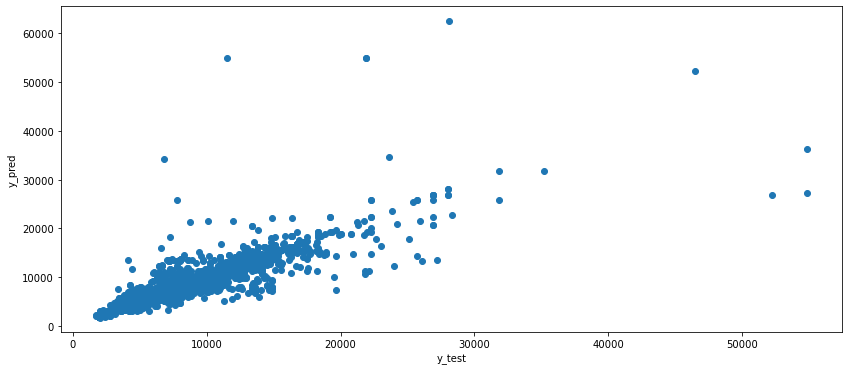

In [66]:
# # plotting original training data wth predicted values for DecisionTreeRegressor model

plt.figure(figsize=(14,6))
plt.scatter(x=y_test,y=y_pred_dt)
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()

In [67]:
# The predicted values looks close enough to original values with We are getting a best fit line for DecisionTreeRegressor
# and we are getting a best fit line.So model seems to be doing good

In [68]:
# Evaluation of models

#Training model with LinearRegression and finding the best state,r2_score

from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split

model_lr = LinearRegression()

score_s=0
state=0
for i in range(0,25):
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state =i)
    model_lr.fit(X_train, y_train)
    y_pred_lr = model_lr.predict(X_test)
    score=r2_score(y_test,y_pred_lr)
    if score>score_s:
        score_s=score
        state=i
        
print('best random_state : ',state)
print('best r2 score : ',score_s)

best random_state :  9
best r2 score :  0.5306110547113339


In [69]:
# finding mean_squared_error,rmse  for LinearRegression

mse=mean_squared_error(y_test,y_pred_lr)
rmse=np.sqrt(mse)

rmse

3391.1563889040176

In [73]:
# Evaluation of models

#Training model with KNeighborsRegressor and finding the best state,r2_score

from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split

model_knr = KNeighborsRegressor()

score_s=0
state=0
for i in range(0,20):
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state =i)
    model_knr.fit(X_train, y_train)
    y_pred_knr = model_knr.predict(X_test)
    score=r2_score(y_test,y_pred_knr)
    if score>score_s:
        score_s=score
        state=i
        
print('best random_state : ',state)
print('best r2 score : ',score_s)

best random_state :  4
best r2 score :  0.7997988041135554


In [74]:
# finding mean_squared_error,rmse  for KNeighborsRegressor

mse=mean_squared_error(y_test,y_pred_knr)
rmse=np.sqrt(mse)

print("mean squared error for KNeighborsRegressor :",mse)
print("root mean squared error for KNeighborsRegressor :",rmse)

mean squared error for KNeighborsRegressor : 4636452.708429437
root mean squared error for KNeighborsRegressor : 2153.2423710370917


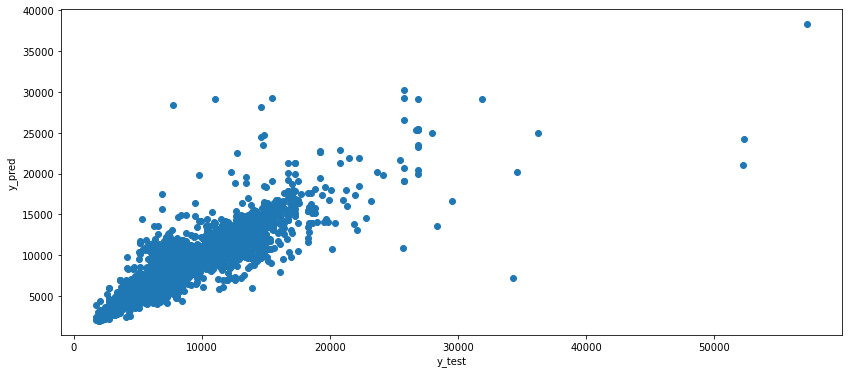

In [75]:
# # plotting original training data wth predicted values for KNeighborsRegressor model

plt.figure(figsize=(14,6))
plt.scatter(x=y_test,y=y_pred_knr)
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()

In [79]:
# Evaluation of models

#Training model with RandomForestRegressor and finding the best state,r2_score

from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split

model_rfr = RandomForestRegressor()

score_s=0
state=0
for i in range(0,10):
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state =i)
    model_rfr.fit(X_train, y_train)
    y_pred_rfr = model_rfr.predict(X_test)
    score=r2_score(y_test,y_pred_rfr)
    if score>score_s:
        score_s=score
        state=i
        
print('best random_state : ',state)
print('best r2 score : ',score_s)

best random_state :  4
best r2 score :  0.9197948797323932


In [77]:
# finding mean_squared_error,rmse  for RandomForestRegressor

mse=mean_squared_error(y_test,y_pred_rfr)
rmse=np.sqrt(mse)

print("mean squared error for RandomForestRegressor :",mse)
print("root mean squared error for RandomForestRegressor :",rmse)

mean squared error for RandomForestRegressor : 2077386.0521827196
root mean squared error for RandomForestRegressor : 1441.3140019380646


In [80]:
y_pred_train=model_rfr.predict(X_train)
mse=mean_squared_error(y_train,y_pred_train)
rmse=np.sqrt(mse)

print("mean squared error for RandomForestRegressor :",mse)
print("root mean squared error for RandomForestRegressor :",rmse)

mean squared error for RandomForestRegressor : 418376.8178415409
root mean squared error for RandomForestRegressor : 646.820545314959


In [81]:
# R2 score of RandomForestRegressor for training data

score=r2_score(y_train,y_pred_train)
print(score)

0.9809968166148662


In [ ]:
# There seems to be overfitting with RandomForestRegressor model 

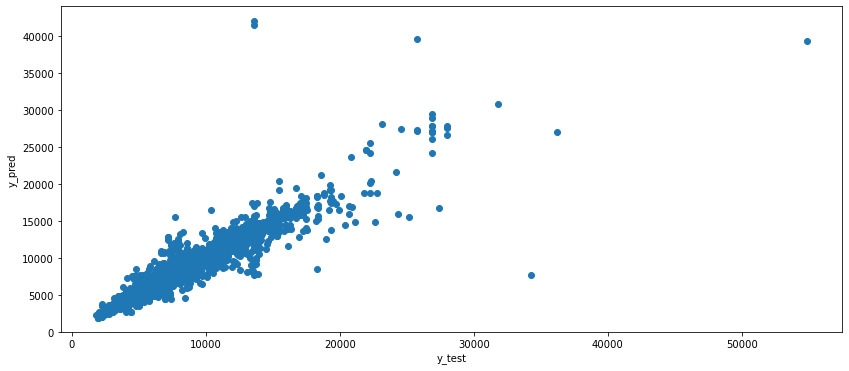

In [78]:
# # plotting original training data wth predicted values for RandomForestRegressor model

plt.figure(figsize=(14,6))
plt.scatter(x=y_test,y=y_pred_rfr)
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()

In [91]:
# Evaluation of models

#Training model with GradientBoostingRegressor and finding the best state,r2_score

from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split

model_gbr = GradientBoostingRegressor()

score_s=0
state=0
for i in range(0,10):
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state =i)
    model_gbr.fit(X_train, y_train)
    y_pred_gbr = model_gbr.predict(X_test)
    score=r2_score(y_test,y_pred_gbr)
    if score>score_s:
        score_s=score
        state=i
        
print('best random_state : ',state)
print('best r2 score : ',score_s)

best random_state :  4
best r2 score :  0.8496985086459006


In [84]:
score=r2_score(y_train,model_gbr.predict(X_train))
print(score)

0.8455071246981563


In [ ]:
#RandomForestRegressor model gives us the best accuracy, with an R2 score of 91%, but the model is overfitting on training data.
#Gradient boosting also gives a score of 84%, which is better than K-Neighbors and the model is not overfitting as well.

In [92]:
#  HYPERPARAMETER TUNING OF GRADIENTBOOSTINGREGRESSOR MODEL


search_grid={'alpha':[0.9,0.09,0.1],'n_estimators':[100,50,10],'learning_rate':[0.1,0.01],'max_depth':[3,4,5],'min_samples_split':[2,3,4],'min_samples_leaf':[1,2,3]}
search=GridSearchCV(model_gbr,search_grid,cv=3)


In [93]:
# Fitting the model

search.fit(X_train,y_train)


GridSearchCV(cv=3, estimator=GradientBoostingRegressor(),
             param_grid={'alpha': [0.9, 0.09, 0.1],
                         'learning_rate': [0.1, 0.01], 'max_depth': [3, 4, 5],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [100, 50, 10]})

In [94]:
search.best_params_

{'alpha': 0.9,
 'learning_rate': 0.1,
 'max_depth': 5,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 100}

In [95]:
print("Best score", search.best_score_)

Best score 0.8707683106526228


In [96]:
search.score(X_test,y_test)

0.8839376878081209

In [97]:

y_pred_gbr1=search.predict(X_test)
score=r2_score(y_test,y_pred_gbr1)
score

0.8839376878081209

In [ ]:
# The r2_score received for Gradient Boosting Regressor comes out to be better after hypertuning , frm 84 to 88 %

In [99]:
# Creating the final model 

Final_model=GradientBoostingRegressor(alpha=0.9,n_estimators=100,learning_rate=0.1,max_depth=5,min_samples_split=4,min_samples_leaf=1)

In [100]:
# Exporting the model through pickle


import pickle
filename='Flight_price_pred.pkl'
pickle.dump(Final_model,open(filename,'wb'))

In [101]:
# Applying model on our test dataset 

df_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL ? BOM ? COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? MAA ? BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL ? BOM ? COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL ? BOM ? COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR ? DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [102]:
# Checking for dulicate values

df_test[df_test.duplicated()].head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
294,Jet Airways,12/06/2019,Delhi,Cochin,DEL ? JAI ? BOM ? COK,05:30,04:25 13 Jun,22h 55m,2 stops,No info
794,Jet Airways,12/06/2019,Delhi,Cochin,DEL ? JAI ? BOM ? COK,05:30,04:25 13 Jun,22h 55m,2 stops,In-flight meal not included
909,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,20:00,22:55,2h 55m,non-stop,No info
974,Air India,12/06/2019,Kolkata,Banglore,CCU ? DEL ? AMD ? BLR,07:00,05:25 13 Jun,22h 25m,2 stops,No info
1011,Jet Airways,9/05/2019,Delhi,Cochin,DEL ? JAI ? BOM ? COK,05:30,04:25 10 May,22h 55m,2 stops,No info


In [103]:
# Dropping duplicate values ,rows

df_test.drop_duplicates(keep='first',inplace=True)
df_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [104]:
# Splitting the Date_of_Journey column to extract the ‘Date’, ‘Month’ and ‘Year’ values, and 
# store them in new columns in our dataframe

df_test['Date_of_Journey']=df_test['Date_of_Journey'].str.split('/')
df_test['Date_of_Journey']

0        [6, 06, 2019]
1       [12, 05, 2019]
2       [21, 05, 2019]
3       [21, 05, 2019]
4       [24, 06, 2019]
             ...      
2666     [6, 06, 2019]
2667    [27, 03, 2019]
2668     [6, 03, 2019]
2669     [6, 03, 2019]
2670    [15, 06, 2019]
Name: Date_of_Journey, Length: 2645, dtype: object

In [105]:
df_test['Date']=df_test['Date_of_Journey'].str[0]
df_test['Month']=df_test['Date_of_Journey'].str[1]
df_test['Year']=df_test['Date_of_Journey'].str[2]

In [106]:
# Splitting the route column and storing extracted city names in different columns

df_test['Route']=df_test['Route'].str.split('?')
df_test['Route']


0       [DEL ,  BOM ,  COK]
1       [CCU ,  MAA ,  BLR]
2       [DEL ,  BOM ,  COK]
3       [DEL ,  BOM ,  COK]
4              [BLR ,  DEL]
               ...         
2666    [CCU ,  DEL ,  BLR]
2667           [CCU ,  BLR]
2668    [DEL ,  BOM ,  COK]
2669    [DEL ,  BOM ,  COK]
2670    [DEL ,  BOM ,  COK]
Name: Route, Length: 2645, dtype: object

In [107]:
df_test['City_1']=df_test['Route'].str[0]
df_test['City_2']=df_test['Route'].str[1]
df_test['City_3']=df_test['Route'].str[2]
df_test['City_4']=df_test['Route'].str[3]

In [108]:
df_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Date,Month,Year,City_1,City_2,City_3,City_4
0,Jet Airways,"[6, 06, 2019]",Delhi,Cochin,"[DEL , BOM , COK]",17:30,04:25 07 Jun,10h 55m,1 stop,No info,6,06,2019,DEL,BOM,COK,NaN
1,IndiGo,"[12, 05, 2019]",Kolkata,Banglore,"[CCU , MAA , BLR]",06:20,10:20,4h,1 stop,No info,12,05,2019,CCU,MAA,BLR,NaN
2,Jet Airways,"[21, 05, 2019]",Delhi,Cochin,"[DEL , BOM , COK]",19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,21,05,2019,DEL,BOM,COK,NaN
3,Multiple carriers,"[21, 05, 2019]",Delhi,Cochin,"[DEL , BOM , COK]",08:00,21:00,13h,1 stop,No info,21,05,2019,DEL,BOM,COK,NaN
4,Air Asia,"[24, 06, 2019]",Banglore,Delhi,"[BLR , DEL]",23:55,02:45 25 Jun,2h 50m,non-stop,No info,24,06,2019,BLR,DEL,NaN,NaN


In [109]:
# Splitting Departure Time in hours and minutes

df_test['Dep_Time']=df_test['Dep_Time'].str.split(':')
df_test['Dep_Time']


0       [17, 30]
1       [06, 20]
2       [19, 15]
3       [08, 00]
4       [23, 55]
          ...   
2666    [20, 30]
2667    [14, 20]
2668    [21, 50]
2669    [04, 00]
2670    [04, 55]
Name: Dep_Time, Length: 2645, dtype: object

In [110]:
df_test['Dep_Time_Hour']=df_test['Dep_Time'].str[0]
df_test['Dep_Time_Min']=df_test['Dep_Time'].str[1]


In [111]:

# Splitting Arrival Time variable

df_test['Arrival_Time']=df_test['Arrival_Time'].str.split(' ')
df_test['Arrival_Dt']=df_test['Arrival_Time'].str[1]



In [112]:
df_test['Time_of_Arrival']=df_test['Arrival_Time'].str[0]
df_test['Time_of_Arrival']=df_test['Time_of_Arrival'].str.split(':')
df_test['Arrival_Time_Hours']=df_test['Time_of_Arrival'].str[0]
df_test['Arrival_Time_Min']=df_test['Time_of_Arrival'].str[1]

In [113]:
# Splitting Duration variable

df_test['Duration']=df_test['Duration'].str.split(' ')
df_test['Duration_hours']=df_test['Duration'].str[0] # extracting hours from duration
df_test['Duration_hours']=df_test['Duration_hours'].str.split('h')
df_test['Duration_hours']=df_test['Duration_hours'].str[0]


In [114]:
df_test['Duration_min']=df_test['Duration'].str[1] # extracting minutes from duration
df_test['Duration_min']=df_test['Duration_min'].str.split('m')
df_test['Duration_min']=df_test['Duration_min'].str[0]


In [115]:
# Exploring Total_Stops column 

df_test['Total_Stops'].replace('non-stop','0',inplace=True) # replacing non-stop flights with 0 value
df_test['Total_Stops']=df_test['Total_Stops'].str.split(' ') # splitting Total_Stops 
df_test['Total_Stops']=df_test['Total_Stops'].str[0] # extracting the integer part of the ‘Total_Stops’ column


In [116]:

# Exploring Additional_Info column 

df_test['Additional_Info'].unique()


array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Long layover', 'Business class',
       'Change airports'], dtype=object)

In [117]:
df_test['Additional_Info'].replace('No Info','No info',inplace=True)

In [118]:
# Dropping unnecessary columns

col=['Date_of_Journey','Route','Dep_Time','Arrival_Time','Duration','Time_of_Arrival']
df_test.drop(col,axis=1,inplace=True)


In [119]:
df_test.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Date,Month,Year,City_1,City_2,City_3,City_4,Dep_Time_Hour,Dep_Time_Min,Arrival_Dt,Arrival_Time_Hours,Arrival_Time_Min,Duration_hours,Duration_min
0,Jet Airways,Delhi,Cochin,1,No info,6,06,2019,DEL,BOM,COK,NaN,17,30,07,04,25,10,55
1,IndiGo,Kolkata,Banglore,1,No info,12,05,2019,CCU,MAA,BLR,NaN,06,20,NaN,10,20,4,NaN
2,Jet Airways,Delhi,Cochin,1,In-flight meal not included,21,05,2019,DEL,BOM,COK,NaN,19,15,22,19,00,23,45
3,Multiple carriers,Delhi,Cochin,1,No info,21,05,2019,DEL,BOM,COK,NaN,08,00,NaN,21,00,13,NaN
4,Air Asia,Banglore,Delhi,0,No info,24,06,2019,BLR,DEL,NaN,NaN,23,55,25,02,45,2,50


In [120]:
df_test.isnull().sum()

Airline                  0
Source                   0
Destination              0
Total_Stops              0
Additional_Info          0
Date                     0
Month                    0
Year                     0
City_1                   0
City_2                   0
City_3                 846
City_4                2273
Dep_Time_Hour            0
Dep_Time_Min             0
Arrival_Dt            1597
Arrival_Time_Hours       0
Arrival_Time_Min         0
Duration_hours           0
Duration_min           252
dtype: int64

In [121]:
# Filling the missing values

# Clearly from above City_4 has maximum null values(9100 out of 10683),so we will be dropping City_4

df_test.drop('City_4',inplace=True,axis=1)


In [122]:
# We need to  replace ‘NaN’ values in ‘City_3’ with ‘None’, 
#since rows where ‘City3’ is missing did not have any stop, just the source and the destination.

df_test['City_3'].fillna('None',inplace=True)


In [123]:
# Replacing missing values in ‘Arrival_date’ column with values in ‘Date’ column

df_test['Arrival_Dt'].fillna(df_test['Date'],inplace=True)


In [124]:
# Replacing missing values in ‘Duration_min’ as 0, since the missing values is the duration time in hours not in min.

df_test['Duration_min'].fillna(0,inplace=True)



In [125]:
# Changing datatype of numerical columns from object to int datatype

df_test['Date']=df_test['Date'].astype('int64')
df_test['Month']=df_test['Month'].astype('int64')
df_test['Year']=df_test['Year'].astype('int64')
df_test['Total_Stops']=df_test['Total_Stops'].astype('int64')
df_test['Dep_Time_Hour']=df_test['Dep_Time_Hour'].astype('int64')
df_test['Dep_Time_Min']=df_test['Dep_Time_Min'].astype('int64')
df_test['Arrival_Dt']=df_test['Arrival_Dt'].astype('int64')
df_test['Arrival_Time_Hours']=df_test['Arrival_Time_Hours'].astype('int64')
df_test['Arrival_Time_Min']=df_test['Arrival_Time_Min'].astype('int64')
df_test['Duration_min']=df_test['Duration_min'].astype('int64')


In [126]:
# Finding the row having Duration_hours as 5m,as journey cannot be of 5m.So we need to drop the row

df_test[df_test['Duration_hours']=='5m']


,Airline,Source,Destination,Total_Stops,Additional_Info,Date,Month,Year,City_1,City_2,City_3,Dep_Time_Hour,Dep_Time_Min,Arrival_Dt,Arrival_Time_Hours,Arrival_Time_Min,Duration_hours,Duration_min
2660,Air India,Mumbai,Hyderabad,2,No info,12,3,2019,BOM,GOI,PNQ,16,50,12,16,55,5m,0


In [128]:
# Dropping the row with index 2660 from dataset

df_test.drop(index=2660,inplace=True,axis=0)


KeyError: '[2660] not found in axis'

In [129]:
# Changing datatype of Duration_hours column from object to int datatype

df_test['Duration_hours']=df_test['Duration_hours'].astype('int64')


In [130]:
# Separating categorical and numerical columns for proper data visualization

cat=['Airline','Source','Destination','City_1','City_2','City_3','Additional_Info']
num=['Date','Month','Year','Dep_Time_Hour','Dep_Time_Min','Arrival_Dt','Arrival_Time_Hours','Arrival_Time_Min','Duration_hours','Duration_min','Price']


In [131]:
# checking skewness in dataset

df_test.skew().sort_values()


Arrival_Time_Hours   -0.446922
Month                -0.401421
Duration_min         -0.102778
Year                  0.000000
Dep_Time_Hour         0.089744
Arrival_Time_Min      0.113221
Dep_Time_Min          0.130667
Date                  0.201375
Arrival_Dt            0.202230
Total_Stops           0.330189
Duration_hours        0.901806
dtype: float64

In [132]:
# Removing skewness from Duration_hours

df_test['Duration_hours']=np.log(df_test['Duration_hours'])


In [133]:
df_test['Duration_hours'].skew()

-0.2883369646199104

In [134]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2644 entries, 0 to 2670
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Airline             2644 non-null   object 
 1   Source              2644 non-null   object 
 2   Destination         2644 non-null   object 
 3   Total_Stops         2644 non-null   int64  
 4   Additional_Info     2644 non-null   object 
 5   Date                2644 non-null   int64  
 6   Month               2644 non-null   int64  
 7   Year                2644 non-null   int64  
 8   City_1              2644 non-null   object 
 9   City_2              2644 non-null   object 
 10  City_3              2644 non-null   object 
 11  Dep_Time_Hour       2644 non-null   int64  
 12  Dep_Time_Min        2644 non-null   int64  
 13  Arrival_Dt          2644 non-null   int64  
 14  Arrival_Time_Hours  2644 non-null   int64  
 15  Arrival_Time_Min    2644 non-null   int64  
 16  Durati

In [135]:
# Changing datatype of Duration_hours column from float to int datatype

df_test['Duration_hours']=df_test['Duration_hours'].astype('int64')


In [136]:
# converting categorical features into numerics

le=LabelEncoder()

for i in cat:
    df_test[i]=le.fit_transform(df_test[i])


In [138]:

# Scaling the dataset and normalizing feature variables

from sklearn.preprocessing import StandardScaler 

scale = StandardScaler()
df_test= scale.fit_transform(df_test)


In [140]:
# Predicting prices for test dataset through HyperParameter tuned model


Prices=search.predict(df_test)

In [145]:
# Storing predicted prices in dataframe

Price_test=pd.DataFrame({'Prices':Prices})

In [146]:
# Printing Dataframe

Price_test

,Prices
0,14040.955915
1,5218.686273
2,11768.462129
3,10747.207613
4,4388.776188
...,...
2639,8172.555608
2640,4694.847666
2641,17123.214657
2642,14348.701406
